In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# plt.style.use('dark_background')
%matplotlib inline

import sklearn
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier

In [35]:
df = pd.read_csv("/content/6accident_data.csv")
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200754AM08507,A,345,NaN,0.0,Fatal,NaN,28-01-2021,Tuesday,1,...,Skidded,No tow/articulation,Offside,0.0,Overtaking moving vehicle - offside,1.0,Car,No,Back,2021.0
1,2009559D02192,A,30,NaN,0.0,Fatal,NaN,29-11-2021,Thursday,1,...,NaN,No tow/articulation,Offside,0.0,Going ahead left-hand bend,1.0,Motorcycle over 500cc,No,Front,2020.0
2,201054MB04210,Motorway,4,NaN,0.0,Fatal,NaN,15-03-2021,Saturday,1,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2.0,Motorcycle over 125cc and up to 500cc,No,Back,2019.0
3,201014A194610,Motorway,18,A,630.0,Fatal,NaN,08-07-2020,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Reversing,3.0,Other vehicle,No,Back,2019.0
4,201014A194610,Motorway,18,A,630.0,Fatal,NaN,30-11-2010,Tuesday,1,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Reversing,3.0,Other vehicle,No,Back,2010.0


In [38]:
print(df.isnull().sum())


Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 10413
2nd_Road_Number                                  262
Accident_Severity                                  0
Carriageway_Hazards                            22649
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           0
Light_Conditions                                   0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
LSOA_of_Accident_Location                        493
Number_of_Casualties                          

Data processing


In [39]:
df.describe(include ='all')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
count,23150,23150,23150.000000,12737,22888.000000,23150,501,23150,23150,23150.000000,...,6033,23149,23149,23149.000000,23149,23149.000000,23149,23149,23149,23149.000000
unique,17102,6,NaN,6,NaN,3,5,1460,7,NaN,...,5,6,9,NaN,18,NaN,13,3,6,NaN
top,201006XP26465,A,NaN,Unclassified,NaN,Slight,Any animal in carriageway (except ridden horse),12-11-2010,Friday,NaN,...,Skidded,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front,NaN
freq,9,11150,NaN,8700,NaN,14924,168,71,3852,NaN,...,4241,22920,17897,NaN,11206,NaN,17860,23123,13164,NaN
mean,NaN,NaN,985.606393,NaN,423.088999,NaN,NaN,NaN,NaN,1.091058,...,NaN,NaN,NaN,0.078319,NaN,1.436995,NaN,NaN,NaN,2014.764266
std,NaN,NaN,1788.884159,NaN,1425.179695,NaN,NaN,NaN,NaN,0.291872,...,NaN,NaN,NaN,0.762517,NaN,0.729579,NaN,NaN,NaN,4.947000
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
25%,NaN,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
50%,NaN,NaN,158.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,2010.000000
75%,NaN,NaN,689.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN,2020.000000


Data cleaning


In [40]:
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)
df.shape

(23150, 51)

In [41]:
#standardize all column names to lowercase, and remove some characters
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(".", '', regex=False)
df.columns = df.columns.str.replace("(", '', regex=False)
df.columns = df.columns.str.replace(")", '', regex=False)
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%d-%m-%Y")
df.dtypes

,0
accident_index,object
1st_road_class,object
1st_road_number,int64
2nd_road_class,object
2nd_road_number,float64
accident_severity,object
carriageway_hazards,object
date,datetime64[ns]
day_of_week,object
did_police_officer_attend_scene_of_accident,int64


In [42]:
#mistyped datatypes
df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
    'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles'], float64: ['latitude', 'longitude', 'speed_limit', 'age_of_vehicle', 'driver_imd_decile', 'engine_capacity_cc', 'vehicle_locationrestricted_lane', 'vehicle_reference', 'year'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidding_and_overtur

In [121]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
accident_index,0.0
1st_road_class,0.0
1st_road_number,0.0
2nd_road_class,0.0
accident_severity,0.0
carriageway_hazards,0.0
date,0.0
day_of_week,0.0
did_police_officer_attend_scene_of_accident,0.0
junction_control,0.0


In [44]:
df['age_of_vehicle'].median()

8.0

In [45]:
df['age_of_vehicle'].describe()

,age_of_vehicle
count,23149.000000
mean,8.438550
std,4.168941
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,58.000000


In [46]:
#df = df.drop(['2nd_road_class'], axis=1)
df['driver_imd_decile'].fillna(method='ffill', inplace=True)
df['age_of_vehicle'].describe()


<ipython-input-46-d5ba4ab0f1b6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['driver_imd_decile'].fillna(method='ffill', inplace=True)
<ipython-input-46-d5ba4ab0f1b6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['driver_imd_decile'].fillna(method='ffill', inplace=True)


,age_of_vehicle
count,23149.000000
mean,8.438550
std,4.168941
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,58.000000


In [47]:
df['model'].describe()

,model
count,21192
unique,4610
top,KA
freq,377


In [48]:
df = df.drop(['lsoa_of_accident_location', '2nd_road_number','make'], axis=1)
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

,0
accident_index,0.0
1st_road_class,0.0
1st_road_number,0.0
2nd_road_class,0.0
accident_severity,0.0
carriageway_hazards,0.0
date,0.0
day_of_week,0.0
did_police_officer_attend_scene_of_accident,0.0
junction_control,0.0


In [49]:
df.shape


(1, 48)

,count
number_of_casualties,
1,1


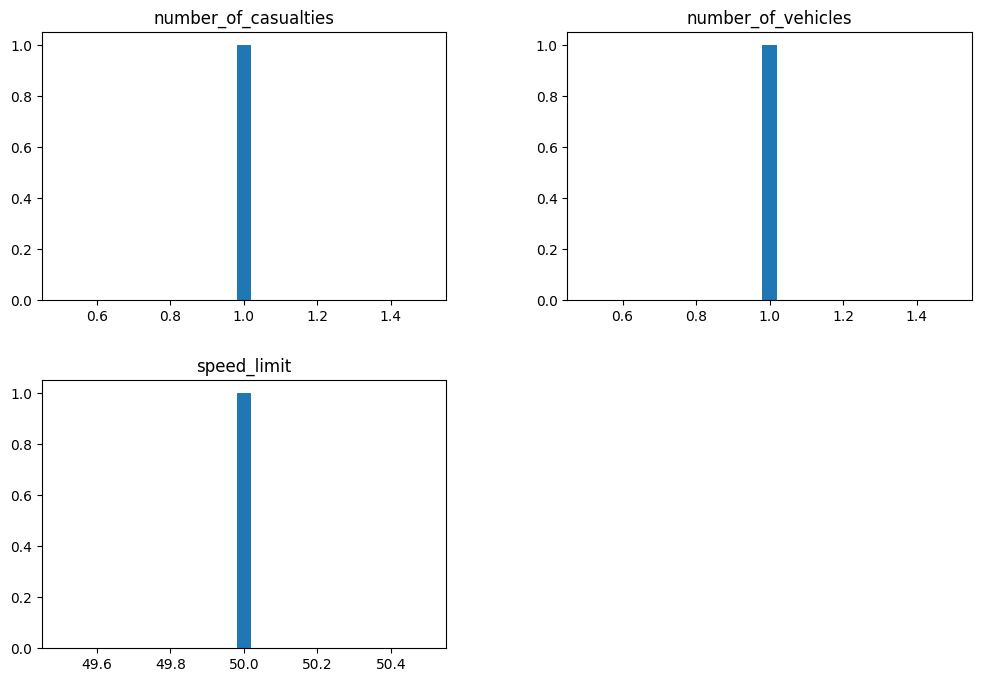

In [50]:
df_num = df[['number_of_casualties','number_of_vehicles','speed_limit']]
df_num.hist( bins=25, grid=False, figsize=(12,8))
df['number_of_casualties'].value_counts()

In [55]:
def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"

df['number_of_casualties']= df['number_of_casualties'].apply(casualities)
df['number_of_casualties'].value_counts()


,count
number_of_casualties,
1,1


In [52]:
df.nunique().sort_values(ascending=False)

,0
accident_index,1
1st_road_class,1
1st_road_number,1
2nd_road_class,1
accident_severity,1
carriageway_hazards,1
date,1
day_of_week,1
did_police_officer_attend_scene_of_accident,1
junction_control,1


In [56]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df ['date'].apply(lambda time: time.month)
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}
df['hour'] = df['time'].str[0:2]
df['hour'] =  pd.to_numeric(df['hour'])
df['hour'] = df['hour'].astype('int')
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

df['time_of_day']= df['hour'].apply(daygroup)

In [57]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
12486,1,Sunday,02:31:00,7


In [58]:
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace= "Motorcycle over 125cc and up to 500cc",value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", value="Motorcycle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Van / Goods 3.5 tonnes mgw or under", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", value="Goods Vehicle")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", value="Car")

df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Bus or coach (17 or more pass seats)",value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", value="Other Vehicle")
df['vehicle_type'].value_counts()/df.shape[0]*100

,count
vehicle_type,
Car,100.0


In [59]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")
#df.drop(df[df['age_band_of_driver'] == 'Data missing or out of range'].index, inplace=True)
df['age_band_of_driver']=df['age_band_of_driver'].replace("Data missing or out of range","11 - 15")
df.drop(df[df['age_band_of_driver'] == 'Nov-15'].index, inplace=True)
df.drop(df[df['age_band_of_driver'] == '06-Oct'].index, inplace=True)
df['age_band_of_driver'].value_counts()/df.shape[0]*100

,count
age_band_of_driver,
21 - 25,100.0


In [60]:

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4:
        return "4+"


df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)
df['number_of_vehicles'].value_counts()/df.shape[0]*100



,count
number_of_vehicles,
1,100.0


In [64]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)
df['accident_severity'].value_counts()/df.shape[0]*100

,count
accident_severity,
Slight,100.0


In [65]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)
df['accident_severity'].value_counts()/df.shape[0]*100

,count
accident_severity,
Slight,100.0


In [70]:
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight",value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal",value="Fatal")
df.shape

(1, 54)

In [71]:
df['accident_seriousness'].value_counts()/df.shape[0]*100

,count
accident_seriousness,
Not Serious,100.0


In [72]:
df.accident_seriousness.value_counts()

,count
accident_seriousness,
Not Serious,1


Data visualization

<ipython-input-139-d4cca744d87b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mt=sns.barplot(x=accidentspermonth.index, y=accidentspermonth.values, palette=colors)
<ipython-input-139-d4cca744d87b>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mt.set_xticklabels(group_labels)


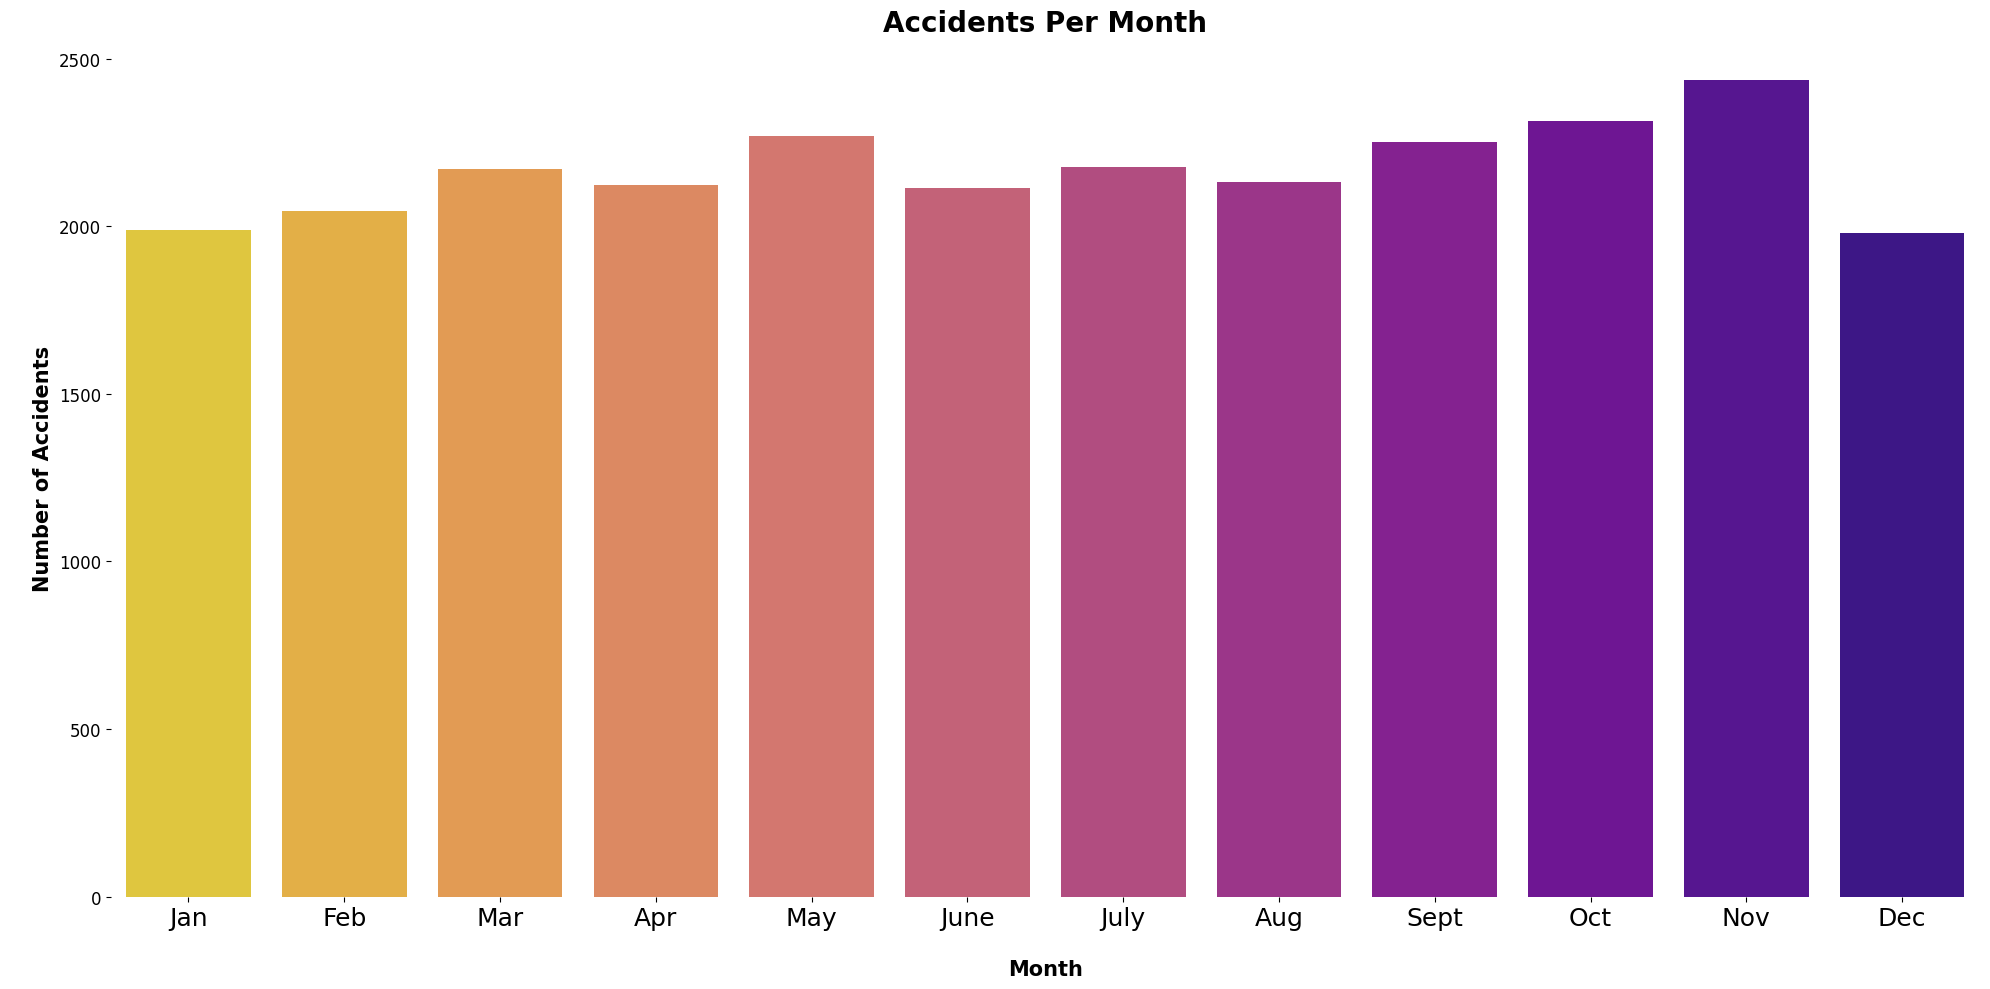

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
try:
    df = pd.read_csv('/content/6accident_data.csv')
except FileNotFoundError:
    print("Error: '/content/6accident_data.csv' not found. Please provide the correct path to your data file.")
    # You might want to exit or handle the error in a different way here
    exit()
# prepare plot
plt.style.use('default')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(x=accidentspermonth.index, y=accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()
